Elektrische Feldstärke  $\vec{E}(P) = \frac{1}{4 \cdot \pi \cdot \epsilon} \cdot \frac{Q}{a^2_{QP}} \cdot \vec{e_{QP}}$ 

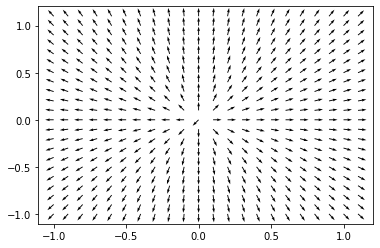

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm 
import simpy as sp
from simpy import *
from sympy.core.symbol import symbols
from sympy.plotting import plot3d#
from sympy.matrices import Matrix, eye, zeros, ones, diag, GramSchmidt
from sympy.utilities.lambdify import lambdify, implemented_function


fig,ax = plt.subplots(1)

#point where Charge is located
x, y, xq, yq = symbols('x y xq yq',real=True)
xq = 0
yq = 0

P = Matrix([x,y])
Q = Matrix([xq,yq])

electricfield = 1/3.148 * 4 * 8.854e-12 * 1.6e-16/(P-Q).norm() * (P-Q)
electricfieldNum = lambdify((x,y),electricfield)


X, Y = np.meshgrid(np.arange(-1, 1.2, 0.1),
                      np.arange(-1, 1.2, 0.1))

electricfieldRes = electricfieldNum(X,Y)

i  = electricfieldRes[0][0]
o  = electricfieldRes[1][0]

ax.quiver(X, Y, i,o)

Elektrische Flussdichte: $\vec{D}(P) = \epsilon \vec{E}(P) = \frac{Q}{4\pi a^2_{QP}}\vec{e_QP}$

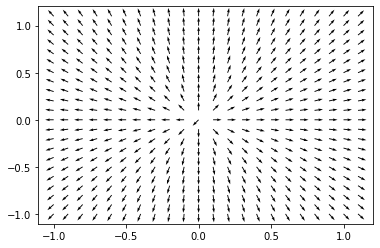

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm 

fig,ax = plt.subplots(1)

xp = 0
yp = 0

x, y = np.meshgrid(np.arange(-1, 1.2, 0.1),
                      np.arange(-1, 1.2, 0.1))

i  = 1 / (np.pi * 4) * 1.6e-16/(np.sqrt((x -xp)**2 + (y-yp)**2)) * (x-xp)
o  = 1 / (np.pi * 4) * 1.6e-16/(np.sqrt((x -xp)**2 + (y-yp)**2)) * (y-yp)

ax.quiver(x, y, i,o)

#ax.streamplot(x, y, i, o, color='black', linewidth=1, cmap=plt.cm.inferno,density=2, arrowstyle='->', arrowsize=1.5)

Quellenstärke (Ladungsdichte): $div(\vec{D})$

Elektrische Feldstärke  $\vec{E}(P) = \frac{1}{4 \cdot \pi \cdot \epsilon} \cdot \frac{Q}{a^2_{QP}} \cdot \vec{e_{QP}}$ 

C:\Users\airph\AppData\Local\Temp\ipykernel_62064\3586610126.py:72: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  graph = ax.pcolormesh(X, Y, divergenceAna(X,Y,[0,0]), cmap=plt.get_cmap('inferno'))


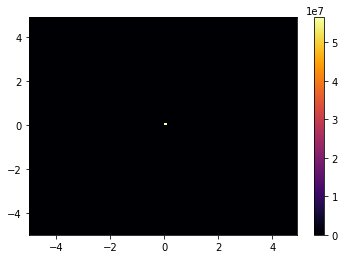

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm 
from sympy.vector import CoordSys3D, Del
from sympy import diff, sin, exp 
from sympy.core.symbol import symbols
from sympy.plotting import plot3d

R = CoordSys3D('R')
xp ,yp = symbols("xp, yp'")


vectorfield  = ((1/(4*3.184*8.854e-12) * 1.6e-16/((R.x-xp)**2+(R.y-yp)**2)**(1/2)) * ((R.x-xp)*R.i + (R.y -yp)*R.j)) 
nablar = Del()
scalarfield = nablar.dot(vectorfield)



def divergenceNum(f):
    scalarField = np.zeros(f[0].shape)
    for i in range(0,len(f)-1):
        for y in range(0,len(f[i])-1):
            for x in range(0,len(f[i][y])-1):
                divergence = 0
                
                if y == 0:
                    divergence += (-f[i][y][x] + f[i][y+1][x])
                elif y == len(f[i])-2:
                    divergence += (-f[i][y][x] + f[i][y-1][x])
                else:
                    divergence += (-f[i][y][x] + f[i][y-1][x]) +(-f[i][y][x] + f[i][y+1][x])
                
                if x == 0:
                    divergence += (-f[i][y][x] + f[i][y][x+1])
                elif x == len(f[i][y])-2:
                    divergence += (-f[i][y][x] + f[i][y][x-1])
                else:
                    divergence += (-f[i][y][x] + f[i][y][x-1]) +(-f[i][y][x] + f[i][y+1][x+1])  
                
                scalarField[y][x] += divergence
    return scalarField

def divergenceAna(X, Y, charge):
    return( (-1.0*X + 1.0*charge[0])*(1.41888570932367e-6*X - 1.41888570932367e-6*charge[0])/((X - charge[0])**2 + (Y - charge[1])**2)**1.5 + 1.41888570932367e-6/((X - charge[0])**2 + (Y - charge[1])**2)**0.5
            +(-1.0*Y + 1.0*charge[1])*(1.41888570932367e-6*Y - 1.41888570932367e-6*charge[1])/((X - charge[0])**2 + (Y- charge[1])**2)**1.5 + 1.41888570932367e-6/((X - charge[0])**2 + (Y - charge[1])**2)**0.5)

fig,ax = plt.subplots(1)


charges = [[0,0]]
Start = -5
Stop = 5
stepSize = 0.1

X,Y = np.meshgrid(np.arange(Start,Stop,stepSize),
                  np.arange(Start,Stop,stepSize))

delta_qX,delta_qY = np.meshgrid(np.zeros( int((Stop-Start) / stepSize)),
                  np.zeros(int((Stop-Start) / stepSize)))


for charge in charges:    
   delta_qX = 1.6e-16/(np.sqrt((X -charge[0])**2 + (Y-charge[1])**2)) * (X-charge[0]) + delta_qX
   delta_qY = 1.6e-16/(np.sqrt((X -charge[0])**2 + (Y-charge[1])**2)) * (Y-charge[1]) + delta_qX
i = 1 / (np.pi * 4 *8.854e-12) * delta_qX
o =1 / (np.pi * 4* 8.854e-12)* delta_qY

#divergenceScalarField = divergence([i,o])

 

graph = ax.pcolormesh(X, Y, divergenceAna(X,Y,[0,0]), cmap=plt.get_cmap('inferno'))
fig.colorbar(graph)

In [4]:
scalarfield

Derivative(1.41888570932367e-6*(R.x - xp)/((R.x - xp)**2 + (R.y - yp')**2)**0.5, R.x) + Derivative(1.41888570932367e-6*(R.y - yp')/((R.x - xp)**2 + (R.y - yp')**2)**0.5, R.y)

$\textit{Div}$ mesh

Text(0.5, 0.92, 'row step size 10, column step size 10')

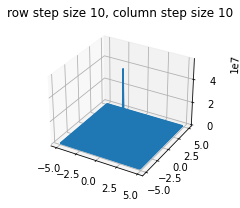

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d


fig = plt.figure(figsize=(3,3))
ax1 = fig.add_subplot(111, projection='3d')
charges = [[0,0]]

Start = -5
Stop = 5
stepSize = 0.1

X,Y = np.meshgrid(np.arange(Start,Stop,stepSize),
                  np.arange(Start,Stop,stepSize))

delta_qX,delta_qY = np.meshgrid(np.zeros( int((Stop-Start) / stepSize)),
                  np.zeros(int((Stop-Start) / stepSize)))
for charge in charges:    
   delta_qX = 1.6e-16/(np.sqrt((X -charge[0])**2 + (Y-charge[1])**2)) * (X-charge[0]) + delta_qX
   delta_qY = 1.6e-16/(np.sqrt((X -charge[0])**2 + (Y-charge[1])**2)) * (Y-charge[1]) + delta_qX
i = 1 / (np.pi * 4 *8.854e-12) * delta_qX
o =1 / (np.pi * 4* 8.854e-12)* delta_qY

# Plot a basic wireframe
ax1.plot_wireframe(X, Y, divergenceAna(X,Y,[0,0]), rstride=1, cstride=1)
ax1.set_title('row step size 10, column step size 10')


Two Charges: Elektrische Feldstärke  $\vec{E}(P) = \frac{1}{4 \cdot \pi \cdot \epsilon} \cdot \frac{Q}{a^2_{QP}} \cdot \vec{e_{QP}}$ 

C:\Users\airph\AppData\Local\Temp\ipykernel_62064\981305752.py:29: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  scalarfield = ax[1].pcolormesh(X, Y,delta_qDiv, cmap=plt.get_cmap('inferno'))


<Figure size 3600x3600 with 0 Axes>

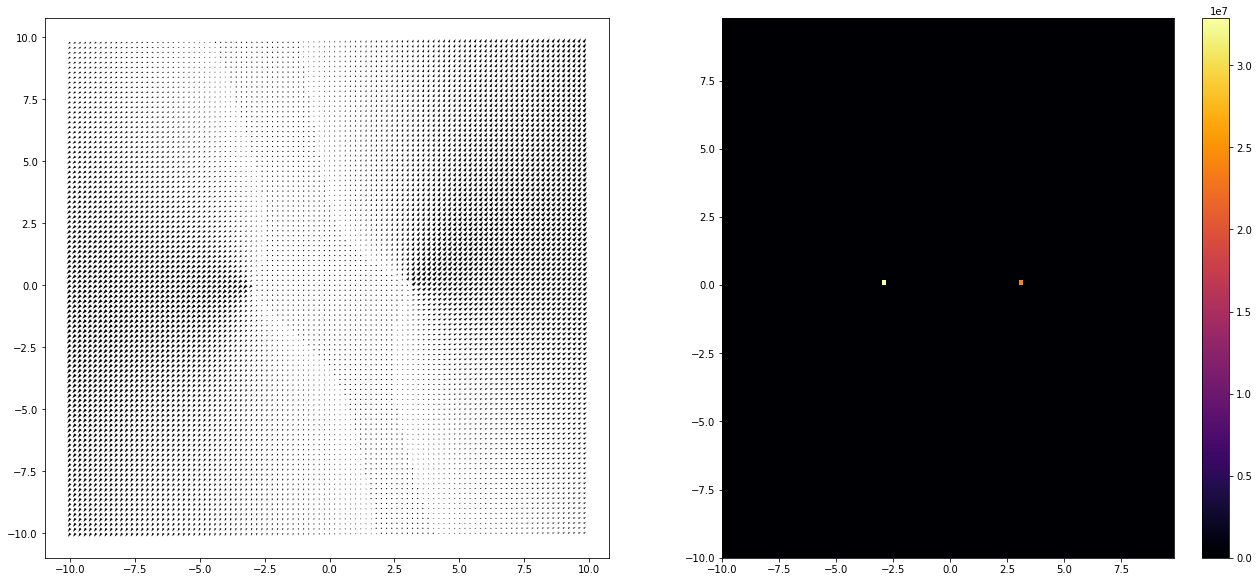

<Figure size 3600x3600 with 0 Axes>

In [6]:
import numpy as np
import matplotlib.pyplot as plt

charges = [[1.6e-16,-3,0],[1.6e-16,3,0]]

Start = -10
Stop = 10
stepSize = 0.20

X,Y = np.meshgrid(np.arange(Start,Stop,stepSize),
                  np.arange(Start,Stop,stepSize))

delta_qX,delta_qY = np.meshgrid(np.zeros( int((Stop-Start) / stepSize)),
                  np.zeros(int((Stop-Start) / stepSize)))

delta_qDiv,de = np.meshgrid(np.zeros( int((Stop-Start) / stepSize)),
                  np.zeros(int((Stop-Start) / stepSize)))

for charge in charges:    
   delta_qX = charge[0]/(np.sqrt((X -charge[1])**2 + (Y-charge[2])**2)) * (X-charge[1]) + delta_qX
   delta_qY = charge[0]/(np.sqrt((X -charge[1])**2 + (Y-charge[2])**2)) * (Y-charge[2]) + delta_qX
   delta_qDiv = divergenceAna(X,Y,[charge[1],charge[2]]) + delta_qDiv
i = 1 / (np.pi * 4 *8.854e-12) * delta_qX
o =1 / (np.pi * 4* 8.854e-12)* delta_qY

fig,ax = plt.subplots(1,2)
plt.subplots_adjust(top=2,right=3)
ax[0].quiver(X, Y, i,o)
scalarfield = ax[1].pcolormesh(X, Y,delta_qDiv, cmap=plt.get_cmap('inferno'))
fig.colorbar(scalarfield)
plt.figure(figsize=(50,50))
#ax[0].streamplot(X, Y, i, o, color='black', linewidth=0.5, cmap=plt.cm.inferno,density=5, arrowstyle='->', arrowsize=1)

3D Elektrische Feldstärke  $\vec{E}(P) = \frac{1}{4 \cdot \pi \cdot \epsilon} \cdot \frac{Q}{a^2_{QP}} \cdot \vec{e_{QP}}$ 

C:\Users\airph\AppData\Local\Temp\ipykernel_62064\4288176348.py:14: RuntimeWarning: divide by zero encountered in true_divide
  vec_X = 1 / (np.pi * 4 * 8.854e-12) * 1.6e-16/(np.sqrt((X -xp)**2 + (Y-yp)**2 + (Z-zp)**2)) * (X-xp)
C:\Users\airph\AppData\Local\Temp\ipykernel_62064\4288176348.py:14: RuntimeWarning: invalid value encountered in multiply
  vec_X = 1 / (np.pi * 4 * 8.854e-12) * 1.6e-16/(np.sqrt((X -xp)**2 + (Y-yp)**2 + (Z-zp)**2)) * (X-xp)
C:\Users\airph\AppData\Local\Temp\ipykernel_62064\4288176348.py:15: RuntimeWarning: divide by zero encountered in true_divide
  vec_Y = 1 / (np.pi * 4 * 8.854e-12) * 1.6e-16/(np.sqrt((X -xp)**2 + (Y-yp)**2 + (Z-zp)**2)) * (X-yp)
C:\Users\airph\AppData\Local\Temp\ipykernel_62064\4288176348.py:15: RuntimeWarning: invalid value encountered in multiply
  vec_Y = 1 / (np.pi * 4 * 8.854e-12) * 1.6e-16/(np.sqrt((X -xp)**2 + (Y-yp)**2 + (Z-zp)**2)) * (X-yp)
C:\Users\airph\AppData\Local\Temp\ipykernel_62064\4288176348.py:16: RuntimeWarning: divide b

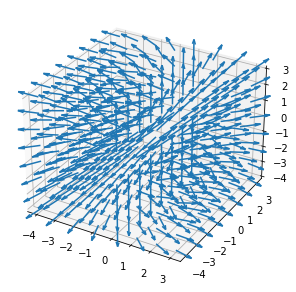

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm 

xp = 0
yp = 0
zp= 0


X,Y,Z = np.meshgrid(np.arange(-4,4,1),
                    np.arange(-4,4,1),
                    np.arange(-4,4,1))

vec_X = 1 / (np.pi * 4 * 8.854e-12) * 1.6e-16/(np.sqrt((X -xp)**2 + (Y-yp)**2 + (Z-zp)**2)) * (X-xp)
vec_Y = 1 / (np.pi * 4 * 8.854e-12) * 1.6e-16/(np.sqrt((X -xp)**2 + (Y-yp)**2 + (Z-zp)**2)) * (X-yp)
vec_Z = 1 / (np.pi * 4 * 8.854e-12) * 1.6e-16/(np.sqrt((X -xp)**2 + (Y-yp)**2+ (Z-zp)**2)) * (Z-zp)

plt.figure(figsize=(5,5))
ax = plt.subplot(projection='3d') 

ax.quiver(X,Y,Z,vec_X,vec_Y,vec_Z,length=1,normalize=True)




Voltage (Work) done by path in electric field: $\vec{E}(P) = \frac{1}{4 \cdot \pi \cdot \epsilon} \cdot \frac{Q}{a^2_{QP}} \cdot \vec{e_{QP}}$ 

Path: $S = \begin{bmatrix} t^2+3 \\ 2t \end{bmatrix}$

$Work = \oint_S \vec{E}(\begin{bmatrix} t^2+3 \\ 2t \end{bmatrix}) \cdot ds = \int_{-4}^4 \vec{E}(\begin{bmatrix} t^2+3 \\ 2t \end{bmatrix}) \cdot \frac{d\vec{S}(t)}{d{t}}  dt $,

$\frac{d\vec{S}(t)}{dt} = \begin{bmatrix} 2t \\ 2 \end{bmatrix}$

 


In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm 
from sympy.vector import CoordSys3D, Del
from sympy import diff, sin, exp 
from sympy.core.symbol import symbols,Symbol
from sympy.plotting import plot3d
from sympy import *


t = Symbol("t",real=True)
x, y, xp, yp, qt = symbols("x y xp yp qt",real=True)
qt = 1.6e-16
xp = 0
yp = 0

S = Matrix([t**2+2,sin(t)**3])
P = Matrix([x,y])
Q = Matrix([xp,yp])

deltaS = diff(S,t)

electricfield  = (1/(4*3.14159265359*8.854e-12) * 1.6e-16/((P-Q).norm()) * (P-Q))
electricfield


Matrix([
[1.43803879007802e-6*x/sqrt(x**2 + y**2)],
[1.43803879007802e-6*y/sqrt(x**2 + y**2)]])

In [9]:
S

Matrix([
[ t**2 + 2],
[sin(t)**3]])

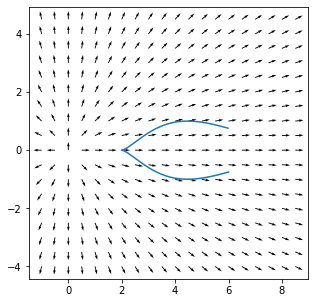

In [10]:
startT = -2
endT = 2

PathNum = lambdify((t),S)
resutlsPath = PathNum(np.arange(startT,endT,0.005))

X,Y = np.meshgrid(np.arange(np.min(resutlsPath[0][0])-3,np.max(resutlsPath[0][0])+3,0.5),
                  np.arange(np.min(resutlsPath[1][0])-3,np.max(resutlsPath[1][0])+4,0.5))

culombForceField = lambdify((x,y),electricfield)
results = culombForceField(X,Y)

fig, ax = plt.subplots(1)
fig.set_size_inches(5,5)
ax.quiver(X,Y,results[0][0],results[1][0])
ax.plot(resutlsPath[0][0],resutlsPath[1][0])

$\textbf{Potential [J/C]}$

In [11]:
potential = 1/(4*3.14159265359*8.854e-12) * 1.6e-16/((Q-P).norm())
potentialNum = lambdify((x,y),potential)
print(potentialNum(PathNum(startT)[0],PathNum(startT)[1]))
print(potentialNum(PathNum(endT)[0],PathNum(endT)[1]))

[2.37813423e-07]
[2.37813423e-07]


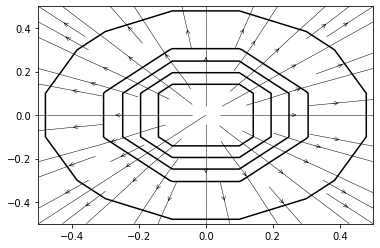

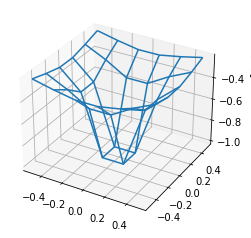

In [12]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib.ticker import MaxNLocator

x_a = np.arange(-0.5,0.5+0.2,0.2)
y_a = np.arange(-0.5,0.5+0.2,0.2)

x_a = x_a[x_a != 0]
y_a = y_a[y_a != 0]

X_t,Y_t = np.meshgrid(x_a,x_a)

b = np.array([3,2,1,9])

fig, ax1 = plt.subplots(1)
ax2= plt.figure().add_subplot(projection='3d')

results = culombForceField(X_t,Y_t)
Z = -1*(potentialNum(X_t,Y_t))

ax1.contour(X_t, Y_t, Z,colors='black',linestyles='solid')
ax2.plot_wireframe(X_t,Y_t,Z, rstride=1, cstride=1)
ax1.streamplot(X_t,Y_t,results[0][0],results[1][0], color='black', linewidth=0.5, cmap=plt.cm.inferno,density=0.5, arrowstyle='->', arrowsize=1)

$\bf{Work: } [V]$

In [13]:
x = S[0]
y = S[1]

P = Matrix([x,y])
Q = Matrix([xp,yp])

culombForceField = (1/(4*3.14159265359*8.854e-12) * 1.6e-16/((P-Q).norm()) * (P-Q))
culombForceField


Matrix([
[1.43803879007802e-6*(t**2 + 2)/sqrt((t**2 + 2)**2 + sin(t)**6)],
[ 1.43803879007802e-6*sin(t)**3/sqrt((t**2 + 2)**2 + sin(t)**6)]])

In [ ]:
workIntegral = (integrate(culombForceField.dot(deltaS),(t,startT, endT)).doit())
workIntegral

In [15]:
import scipy.integrate as integrateScipy

integralNum = lambdify((t),simplify(culombForceField.dot(deltaS)),modules='scipy')

integrateScipy.quad(integralNum,startT,endT)[0]

0.0

$\bf{Length \space of \space Path :} [m]$

In [33]:

arclength = integrate(diff(S,t).norm(),(t,startT,endT)).doit()
arclength

Integral(sqrt(16*sin(4*t)**2 + 1), (t, -2, 2))

In [32]:
arcLengthNum = diff(S,t).norm()
arclengthValue = lambdify((t),arcLengthNum,modules='numpy')
integrateScipy.quad(arclengthValue,startT, endT)[0]

11.31786350447326

$\textbf{Magnetic Field Of monopol with defined charge density}$

In [44]:
pathX, pathY, Px, Py, dQ, t = symbols('pathX pathY Px Py dQ t', real=True)


dQ = 1.6e-16*2000
pathX = t
pathY = t

P = Matrix([Px,Py])
S = Matrix([pathX, pathY])

chargeIntergral = ((dQ/ (P-S).norm()**2 * (P-S)) * simplify(diff(S,t)).norm())
chargeIntergralX = lambdify((t,Px,Py),chargeIntergral[0],modules='scipy')
chargeIntergralY = lambdify((t,Px,Py),chargeIntergral[1],modules='scipy')

chargeIntergral



Matrix([
[3.2e-13*sqrt(2)*(Px - t)/((Px - t)**2 + (Py - t)**2)],
[3.2e-13*sqrt(2)*(Py - t)/((Px - t)**2 + (Py - t)**2)]])

<lambdifygenerated-32>:2: RuntimeWarning: invalid value encountered in double_scalars
  return 3.2e-13*sqrt(2)*(Px - t)/((Px - t)**2 + (Py - t)**2)
C:\Users\airph\AppData\Local\Temp\ipykernel_62064\195883730.py:5: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  resX[y][x] = integrateScipy.quad(chargeIntergralX,-2,3,args=(X[y][x],Y[y][x]))[0]


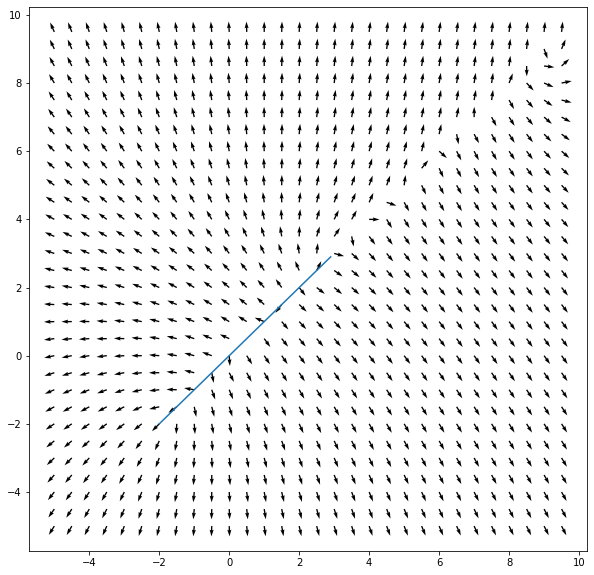

In [47]:
def integrateNum(X,Y):
    resX, resY = np.meshgrid(np.linspace(0,1,num=len(X)),np.linspace(0,1,num=len(Y)))
    for y in range(0,len(Y)):
        for x in range(0,len(X)):
            resX[y][x] = integrateScipy.quad(chargeIntergralX,-2,3,args=(X[y][x],Y[y][x]))[0]
            resY[y][x] = integrateScipy.quad(chargeIntergralY,-2,3*np.pi,args=(X[y][x],Y[y][x]))[0]
    return np.array([resX,resY])

X,Y = np.meshgrid(np.arange(-5,10,.5),np.arange(-5,10,.5))
tI = np.arange(-2,3,0.1)
electricfield = (1/(4*3.14159265359*8.854e-12)) * integrateNum(X,Y)
pathXG = tI
pathYG = tI

plt.figure(figsize=(10,10))

ax = plt.subplot()

electricXNorm = electricfield[0] / np.sqrt(electricfield[0]**2 + electricfield[1]**2)
electricYNorm = electricfield[1] / np.sqrt(electricfield[0]**2 + electricfield[1]**2)

ax.quiver(X,Y,electricXNorm,electricYNorm)
ax.plot(pathXG,pathYG)

